In [14]:
import pandas as pd

# Parquet 파일 경로
file_path = "C:/Users/성원/Desktop/딥러닝/deeplearningchallenge - 복사본/deep_chal_multitask_dataset_sample.parquet"

# 파일 불러오기
df = pd.read_parquet(file_path)
#pd.set_option('display.max_colwidth', None)

# 상위 5개 행 출력
print(df.head())

  input_type        task                                              input  \
0      image  captioning  https://i.pinimg.com/originals/c8/c9/76/c8c976...   
1      image  captioning  https://pulpcovers.com/wp-content/uploads/2022...   
2      image  captioning                https://i.redd.it/079wfb6b6fec1.jpg   
3      image  captioning  https://pulpcovers.com/wp-content/uploads/2020...   
4      image  captioning  https://pulpcovers.com/wp-content/uploads/2015...   

                                              output question  
0  \nThe image is a digital illustration of a fut...           
1  \nThe image is the cover of a book titled "A P...           
2  \nThe image is a black and white illustration ...           
3  \nThe image is the cover of a book titled "Det...           
4  \nThe image is the cover of a book titled "Lov...           


In [21]:
print(df['task'].unique())

['captioning' 'vqa' 'math_reasoning' 'summarization' 'text_qa']


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import io
import base64

def display_image_from_base64(base64_str):
    try:
        img_data = base64.b64decode(base64_str)
        img = Image.open(io.BytesIO(img_data))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"[Error] 이미지 디코딩 실패: {e}")

def print_sample_by_task(task_name, n=1):
    task_name_clean = task_name.lower().strip()
    df['task_clean'] = df['task'].str.lower().str.strip()

    subset = df[df['task_clean'] == task_name_clean]
    sample = subset.head(n).copy()

    print(f"\n=== [{task_name}] 샘플 {len(sample)}개 ===")

    if sample.empty:
        print("⚠️ 해당 task에 해당하는 데이터가 없습니다.")
        return

    for i, (_, row) in enumerate(sample.iterrows()):
        print(f"\n--- 샘플 {i} ---")
        print(f"input_type: {row['input_type']}")

        if row['input_type'] == 'image':
            input_data = row['input']
            if isinstance(input_data, str) and len(input_data) > 500:
                print("이미지 디코딩 중...")
                display_image_from_base64(input_data)
            else:
                print(f"input (URL?): {input_data}")
        else:
            print(f"input: {row['input']}")

        if 'question' in row and isinstance(row['question'], str) and row['question'].strip():
            print(f"\n[Question]\n{row['question']}")

        print(f"\n[Output]\n{row['output']}")



=== [captioning] 샘플 1개 ===

--- 샘플 0 ---
input_type: image
input (URL?): https://i.pinimg.com/originals/c8/c9/76/c8c9763ebaaf41dffa2b8dfbb330bb58.jpg

[Output]

The image is a digital illustration of a futuristic cityscape at sunset. The sky is a beautiful orange and pink color, with the sun setting in the background. The city is made up of tall buildings and skyscrapers, with a river running through the center. On the right side of the image, there is a train with two people inside, one of whom is wearing a white helmet and the other is sitting in the driver's seat. The train appears to be a passenger train, as there are two windows on the side. The people are looking out the window of the train, and the train is moving along a winding road that cuts through the city. The image has a futuristic and sci-fi feel to it.


=== [vqa] 샘플 1개 ===

--- 샘플 0 ---
input_type: image
이미지 디코딩 중...


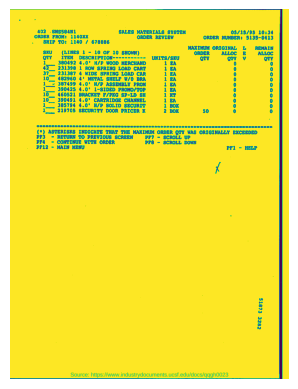


[Question]
mention the date at top of the page ?

[Output]
05/15/95

=== [math_reasoning] 샘플 1개 ===

--- 샘플 0 ---
input_type: text
input: Mimi picked up 2 dozen seashells on the beach.  Kyle found twice as many shells as Mimi and put them in his pocket. Leigh grabbed one-third of the shells that Kyle found.  How many seashells did Leigh have?

[Output]
Mimi has 2 x 12 = <<2*12=24>>24 sea shells.
Kyle has 24 x 2 = <<24*2=48>>48 sea shells.
Leigh has 48 / 3 = <<48/3=16>>16 sea shells.
#### 16

=== [summarization] 샘플 1개 ===

--- 샘플 0 ---
input_type: text
input: SECTION 1. SHORT TITLE.

    This Act may be cited as the ``Veterans Access to Timely Medical 
Appointments Act''.

SEC. 2. FINDINGS.

    Congress finds the following:
            (1) The Secretary of Veterans Affairs is statutorily 
        obligated to provide eligible individuals who served in the 
        Armed Forces with access to health care and benefits provided 
        by the Department of Veterans Affairs related to su

In [39]:
# task 목록
tasks = ['captioning', 'vqa', 'math_reasoning', 'summarization', 'text_qa']

for t in tasks:
    print_sample_by_task(t)

In [40]:
def print_summarization_samples(df, n=3):
    task_name = "summarization"
    print(f"\n=== [{task_name}] 샘플 {n}개 ===")
    
    subset = df[df['task'] == task_name]
    sample = subset.sample(n=min(n, len(subset))).copy()

    for i, row in sample.iterrows():
        print(f"\n--- 샘플 {i} ---")
        print(f"input_type: {row['input_type']}")

        print(f"\n[Input 전문]\n{row['input'][:1000]}...")  # 너무 길면 앞부분만 출력 (필요시 생략 없이 전체 출력 가능)
        
        if 'question' in row and isinstance(row['question'], str) and row['question'].strip():
            print(f"\n[Question]\n{row['question']}")
        
        print(f"\n[Output 요약]\n{row['output']}")


In [42]:
print_summarization_samples(df, n=1)



=== [summarization] 샘플 1개 ===

--- 샘플 34 ---
input_type: text

[Input 전문]
SECTION 1. SHORT TITLE.

    This Act may be cited as the ``King Holiday and Service Act of 
1994''.

SEC. 2. MARTIN LUTHER KING, JR. FEDERAL HOLIDAY COMMISSION.

    The Act entitled ``An Act to establish a commission to assist in 
the first observance of the Federal legal holiday honoring Martin 
Luther King, Jr.'', approved August 27, 1984 (36 U.S.C. 169j and 
following) is amended--
        (1) in section 3(1) by inserting ``(including service 
    opportunities)'' after ``activities'';
        (2) in section 4(a) by striking ``and'' at the end of paragraph 
    (5), by striking the period at the end of paragraph (6) and 
    inserting ``; and'', and by adding at the end the following:
        ``(7) the Chief Executive Officer of the Corporation for 
    National and Community Service, appointed under section 193 of the 
    National and Community Service Act of 1990 (42 U.S.C. 12651c).'';
        (3) in sec